# Diamond Price Analysis

This JupyterLab notebook explores the Diamond Prices dataset and performs various data analysis tasks using Python and the pandas library. In this notebook, I will perform data preprocessing, visualize the data using different plots and charts, and apply linear regression models to predict diamond prices.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso

## Data Preprocessing

Before I proceed with the analysis, let's perform some necessary steps to prepare data for visualization and modeling

In [2]:
# Load csv file
df = pd.read_csv('data/diamonds.csv')

In [3]:
# First rows of the data frame
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
# Display information about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
# Display descriptive statistics
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
# Display number of rows and columns
df.shape

(53940, 10)

In [7]:
# Drop rows with missing values
df.dropna(inplace=True)
df = df[(df['x'] != 0) & (df['y'] != 0) & (df['z'] != 0)]

## Data Visualisation

In this section, I will visualize the relationships between different variables in the dataset

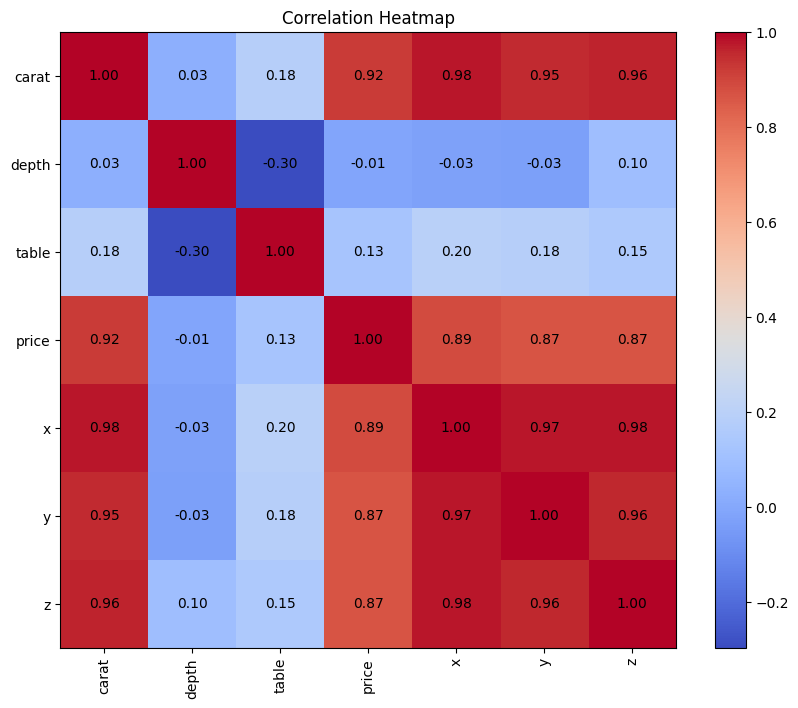

In [8]:
# Select numeric columns
numeric_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Calculate the correlation matrix
df_numeric = df[numeric_cols]
corr_matrix = df_numeric.corr()

# Generate the correlation heatmap
plt.figure(figsize=(10, 8))
heatmap = plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')

plt.colorbar(heatmap)

plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

plt.title('Correlation Heatmap')

# Display correlation values in each square
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.show()

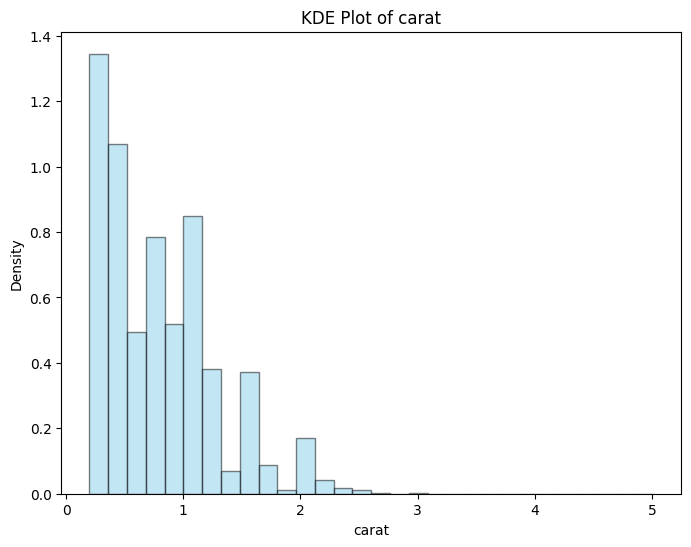

In [9]:
# Create KDE plot for carat
col = 'carat'
plt.figure(figsize=(8, 6))
plt.hist(df[col], bins=30, density=True, alpha=0.5, color='skyblue', edgecolor='black')
plt.xlabel(col)
plt.ylabel('Density')
plt.title(f'KDE Plot of {col}')
plt.show()

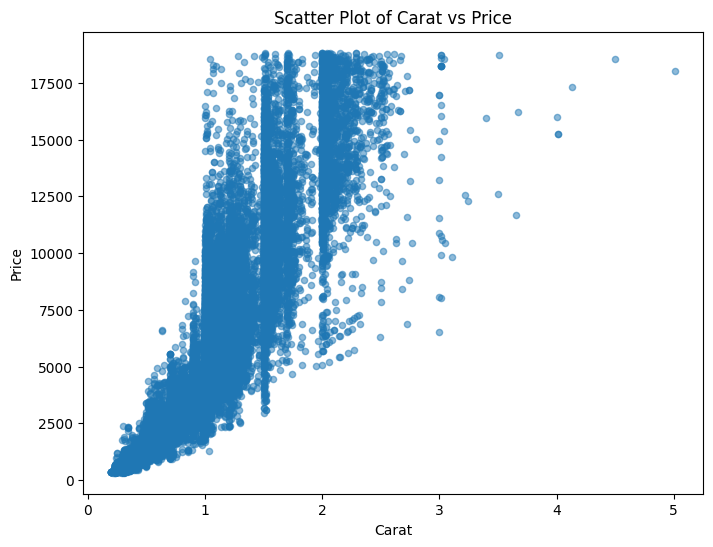

In [10]:
# Scatter plot of carat vs price
plt.figure(figsize=(8, 6))
plt.scatter(df['carat'], df['price'], s=20, alpha=0.5)
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Scatter Plot of Carat vs Price')
plt.show()

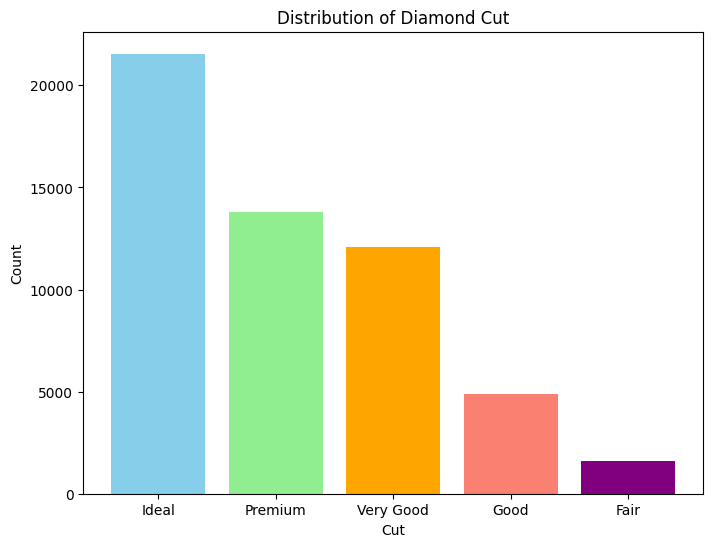

In [11]:
# Count the frequency of each cut category
cut_counts = df['cut'].value_counts()

# Define colors for each bar
colors = ['skyblue', 'lightgreen', 'orange', 'salmon', 'purple']

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(cut_counts.index, cut_counts.values, color=colors)
plt.xlabel('Cut')
plt.ylabel('Count')
plt.title('Distribution of Diamond Cut')
plt.show()

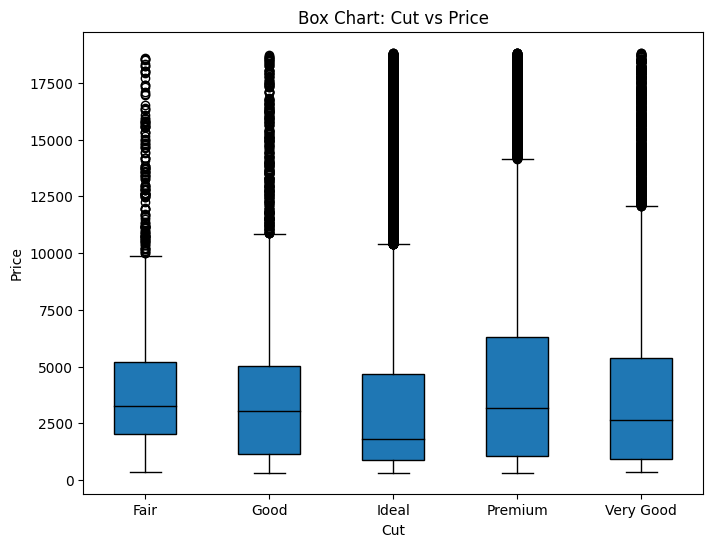

In [12]:
# Group the price values by cut category
grouped_data = df.groupby('cut')['price'].apply(list)

# Create a box chart for cut vs price
plt.figure(figsize=(8, 6))
plt.boxplot(grouped_data, labels=grouped_data.index, patch_artist=True, medianprops={'color': 'black'})
plt.xlabel('Cut')
plt.ylabel('Price')
plt.title('Box Chart: Cut vs Price')
plt.show()

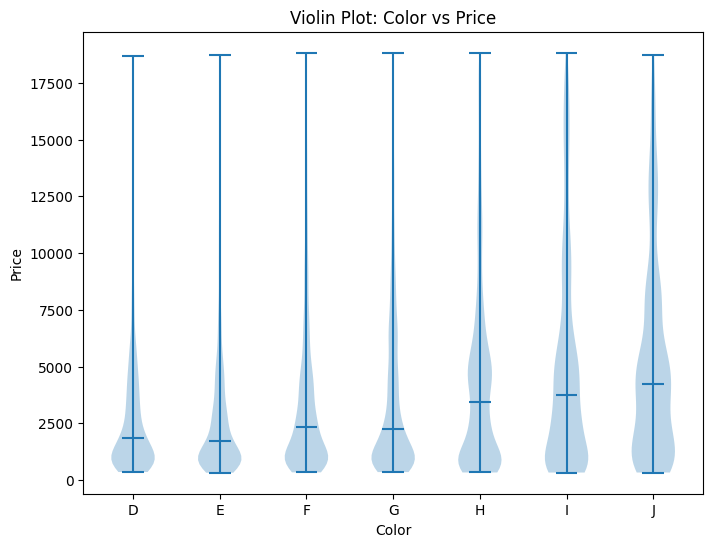

In [13]:
# Group the price values by color category
grouped_data = df.groupby('color')['price'].apply(list)

# Create a violin plot for color vs price
plt.figure(figsize=(8, 6))
plt.violinplot(grouped_data, showmedians=True)
plt.xticks(range(1, len(grouped_data) + 1), grouped_data.index)
plt.xlabel('Color')
plt.ylabel('Price')
plt.title('Violin Plot: Color vs Price')
plt.show()

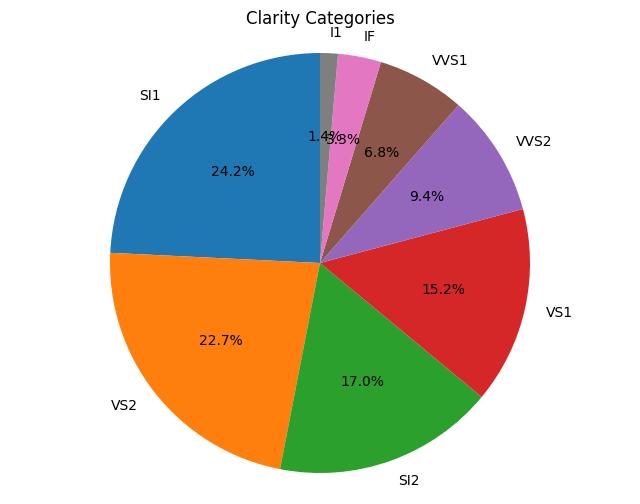

In [14]:
# Count the frequency of each clarity category
clarity_counts = df['clarity'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(clarity_counts.values, labels=clarity_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Clarity Categories')
plt.show()

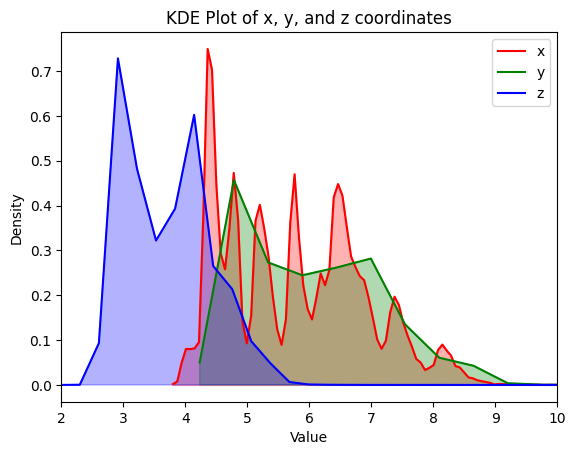

In [15]:
# Compute the KDE for each variable
kde_x = np.histogram(df['x'], bins=100, density=True)
kde_y = np.histogram(df['y'], bins=100, density=True)
kde_z = np.histogram(df['z'], bins=100, density=True)

# Plot the KDEs
plt.plot(kde_x[1][1:], kde_x[0], color='r', label='x')
plt.plot(kde_y[1][1:], kde_y[0], color='g', label='y')
plt.plot(kde_z[1][1:], kde_z[0], color='b', label='z')

# Shade the area under the curves
plt.fill_between(kde_x[1][1:], kde_x[0], alpha=0.3, color='r')
plt.fill_between(kde_y[1][1:], kde_y[0], alpha=0.3, color='g')
plt.fill_between(kde_z[1][1:], kde_z[0], alpha=0.3, color='b')

# Set x-axis limit
plt.xlim(2, 10)

# Add labels and legend
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.title('KDE Plot of x, y, and z coordinates')
plt.show()

## Modeling

Finally, we will build a linear regression model to predict diamond prices based on the available features. We will split the dataset into training and testing sets, fit the model to the training data, and evaluate its performance on the testing data.

In [16]:
object_columns = ['cut', 'color', 'clarity']

# Drop the x, y, and z columns
df_model = df.copy()
df_model.drop(['x', 'y', 'z'], axis=1, inplace=True)

# Perform one-hot encoding
df_model = pd.get_dummies(df_model, columns=object_columns)

# Split the data into train and test sets
train_df = df_model.sample(frac=0.8,)
test_df = df_model.drop(train_df.index)

In [17]:
# Create the linear regression model
model = LinearRegression()

# Prepare the training data
X_train = train_df.drop('price', axis=1)
y_train = train_df['price']

# Fit the model to the training data
model.fit(X_train, y_train)

# Prepare the test data
X_test = test_df.drop('price', axis=1)
y_test = test_df['price']

# Predict on the test data
y_pred = model.predict(X_test)

In [18]:
print('####### Linear Regression Evaluation Metrics #######')
print('Score:  %.4f ' % model.score(X_test, y_test))
print()

# Calculate additional evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error (MSE)  : %.2f ' % mse)
print('Mean Absolute Error (MAE)  : %.2f ' % mae)
print('Root Mean Squared Error (RMSE) : %.2f ' % rmse)
print('R^2 Score (R2)   : %.2f ' % r2)

####### Linear Regression Evaluation Metrics #######
Score:  0.9179 

Mean Squared Error (MSE)  : 1279363.53 
Mean Absolute Error (MAE)  : 794.78 
Root Mean Squared Error (RMSE) : 1131.09 
R^2 Score (R2)   : 0.92 


In [19]:
# Create the Lasso regression model
model = Lasso(alpha=0.1, max_iter=10000)

# Prepare the training data
X_train = train_df.drop('price', axis=1)
y_train = train_df['price']

# Fit the model to the training data
model.fit(X_train, y_train)

# Prepare the test data
X_test = test_df.drop('price', axis=1)
y_test = test_df['price']

# Predict on the test data
y_pred = model.predict(X_test)

In [20]:
# Print evaluation metrics and scores
print('####### Lasso Regression Evaluation Metrics #######')
print('Score : %.4f' % model.score(X_test, y_test))
print()

# Calculate additional evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error (MSE)  : %.2f ' % mse)
print('Mean Absolute Error (MAE)  : %.2f ' % mae)
print('Root Mean Squared Error (RMSE) : %.2f ' % rmse)
print('R^2 Score (R2)   : %.2f ' % r2)

####### Lasso Regression Evaluation Metrics #######
Score : 0.9179

Mean Squared Error (MSE)  : 1279214.15 
Mean Absolute Error (MAE)  : 794.48 
Root Mean Squared Error (RMSE) : 1131.02 
R^2 Score (R2)   : 0.92 
